In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time as tm
import math # for math.inf (upper limit)

In [175]:
# load data for baseline of each class

data_choose = 4
data_locs = ['us', 'United_Kingdom', 'Netherlands', 'France', 'Germany']
data_loc = data_locs[data_choose]
file = f'../../dataset/{data_loc}.csv' # choose the file want to read

df = pd.read_csv(file)  # read csv
df = pd.DataFrame(df) # trans into dataframe

time_start = tm.time() #開始計時

ip_time = dict()
special_chr = ["{", "}", "'", ":", " "]

vpn_nan = 0
vpn_server = dict()
for i in range(len(df)):
    # vpn_server
    vpn_point = df['vpnServerId'][i]
    if (pd.isna(vpn_point)): vpn_nan+=1
    elif vpn_point not in vpn_server: vpn_server[vpn_point] = 1
    elif vpn_point in vpn_server: vpn_server[vpn_point] += 1
        
    # ip_time
    raw_points = df['transactionList'][i]
    points = ''.join(e for e in raw_points if e not in special_chr)
    points = points.split(",")
    for j in range(len(points)):
        time = points[j][:17]
        ip = points[j][17:]
        if ip not in ip_time:
            ip_time[ip] = [time]
        else:
            ip_time[ip].append(time)

total_num = len(ip_time)
print(f'data_loc: {data_loc}')
print(f'num of total server: {total_num}')
print(f'vpn_nan: {vpn_nan}')
print(vpn_server)
time_end = tm.time()
time_c = time_end - time_start
print(f'time cost: {time_c}') # about (sec)
print(f'the size of data {len(df)}')

data_loc: Germany
num of total server: 1066
vpn_nan: 0
{'de930': 56151, 'de941': 68136}
time cost: 31.807019472122192
the size of data 124287


In [176]:
dates = []

if data_loc == 'us':
    dates.append(['2021-04-29', '2021-04-30', '2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05'])
    dates.append(['2021-05-07', '2021-05-08', '2021-05-09', '2021-05-10', '2021-05-11',
                  '2021-05-12', '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16'])
    
elif data_loc == 'United_Kingdom':
    dates.append(['2021-04-29', '2021-04-30', '2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05'])
    dates.append(['2021-05-07', '2021-05-08', '2021-05-09', '2021-05-10', '2021-05-11',
                  '2021-05-12', '2021-05-13', '2021-05-14', '2021-05-15'])
    
elif data_loc == 'Netherlands':
    dates.append(['2021-06-18', '2021-06-19', '2021-06-20', '2021-06-21', '2021-06-22',
                  '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27'])
    dates.append(['2021-06-30', '2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
                  '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09',
                  '2021-07-10', '2021-07-11', '2021-07-12', '2021-07-13'])
    
elif data_loc == 'France':
    dates.append(['2021-04-29', '2021-04-30', '2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05'])

elif data_loc == 'Germany':
    dates.append(['2021-06-04', '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
                  '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14'])


In [177]:
# dataset pre-processing
# select specific period from ip_time

def get_ip_time(ip_data=ip_time, period='2021', period_ip_time=None): # period_ip_time: use to accumulate date
    if period_ip_time is None:
        period_ip_time = dict()
    if type(period) == str:
        len_p = len(period)
        for ip in ip_data:
            for time in ip_data[ip]:
                if time[0:len_p] == period:
                    if ip not in period_ip_time:
                        period_ip_time[ip] = [time]
                    else:
                        period_ip_time[ip] += [time]
    elif type(period) == list: #[time_1, time_2, ...]
        period_ip_time = get_ip_time(period=period[0])
        for time_i in period[1:]:
            period_ip_time = get_ip_time(period=time_i, period_ip_time=period_ip_time)
    return period_ip_time

#data_2021 = get_ip_time(period='2021')

data_period_0 = get_ip_time(ip_data=ip_time, period=dates[0])

if data_loc == 'us' or data_loc == 'United_Kingdom' or data_loc == 'Netherlands':
    data_period_1 = get_ip_time(ip_data=ip_time, period=dates[1])
    
elif data_loc == 'France' or data_loc == 'Germany':
    data_period_1 = data_period_0

In [178]:
# setup hour axis for below chart
hour_axis = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
             '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

# hour_period - fix to n_periods=3, slide_hour=0
n_periods=3
slide_hour=0

hour_period = []
period_len=24//n_periods
for i in range(n_periods-1):
    hour_period.append(hour_axis[period_len*i+slide_hour : period_len*(i+1)+slide_hour])
hour_period.append(hour_axis[period_len*(n_periods-1) + slide_hour:] + hour_axis[:slide_hour])

print(f'hour_period: {hour_period}')

print(f'p0: num of ip={len(data_period_0)}')
print(f'p1: num of ip={len(data_period_1)}')

# sort time in data_ip_time (of each ip)
for ip in data_period_0:
    data_period_0[ip] = sorted(data_period_0[ip])
for ip in data_period_1:
    data_period_1[ip] = sorted(data_period_1[ip])

# check result
for key, value in data_period_0.items():
    print(key)
    print(value[0:5])
    break
for key, value in data_period_1.items():
    print(key)
    print(value[0:5])
    break

hour_period: [['00', '01', '02', '03', '04', '05', '06', '07'], ['08', '09', '10', '11', '12', '13', '14', '15'], ['16', '17', '18', '19', '20', '21', '22', '23']]
p0: num of ip=1066
p1: num of ip=1066
185.42.207.23
['2021-06-04T000006', '2021-06-04T000006', '2021-06-04T000007', '2021-06-04T000009', '2021-06-04T000017']
185.42.207.23
['2021-06-04T000006', '2021-06-04T000006', '2021-06-04T000007', '2021-06-04T000009', '2021-06-04T000017']


In [179]:
# caculate baseline - number of servers in one date

# period_0
ip_date_dict_p0 = dict()
for ip in data_period_0:
    for time in data_period_0[ip]:
        date = time[5:10]
        if date not in ip_date_dict_p0:
            ip_date_dict_p0[date] = [ip]
        elif ip not in ip_date_dict_p0[date]:
            ip_date_dict_p0[date].append(ip)
# baseline
baseline_ip_sum_p0 = []
for date in sorted(ip_date_dict_p0):
    print(date)
    baseline_ip_sum_p0.append(len(ip_date_dict_p0[date]))
print(f'baseline_ip_sum_p0: {baseline_ip_sum_p0}')
    
# period_1
ip_date_dict_p1 = dict()
for ip in data_period_1:
    for time in data_period_1[ip]:
        date = time[5:10]
        if date not in ip_date_dict_p1:
            ip_date_dict_p1[date] = [ip]
        elif ip not in ip_date_dict_p1[date]:
            ip_date_dict_p1[date].append(ip)
# baseline
baseline_ip_sum_p1 = []
for date in sorted(ip_date_dict_p1):
    print(date)
    baseline_ip_sum_p1.append(len(ip_date_dict_p1[date]))
print(f'baseline_ip_sum_p1: {baseline_ip_sum_p1}')

06-04
06-05
06-06
06-07
06-08
06-09
06-10
06-11
06-12
06-13
06-14
baseline_ip_sum_p0: [739, 721, 659, 354, 330, 431, 707, 428, 501, 997, 167]
06-04
06-05
06-06
06-07
06-08
06-09
06-10
06-11
06-12
06-13
06-14
baseline_ip_sum_p1: [739, 721, 659, 354, 330, 431, 707, 428, 501, 997, 167]


In [180]:
# file path for different dataset

if data_loc == 'us':
    file_path_data_loc = ['us_period_0', 'us_period_1']
    file_path_period = ['', '']
    
elif data_loc == 'United_Kingdom' or data_loc == 'Netherlands':
    file_path_data_loc = [f'{data_loc}', f'{data_loc}']
    file_path_period = ['period_0/', 'period_1/']

elif data_loc == 'France' or data_loc == 'Germany':
    file_path_data_loc = [f'{data_loc}', f'{data_loc}']
    file_path_period = ['', '']


In [181]:
# caculate baseline in clusters
def baseline_class(period_choose, n_cluster, label):
    id_index_path = f'./{file_path_data_loc[period_choose]}/random_nc_2to8/p1_capture_history/{file_path_period[period_choose]}ip_index.txt'
    with open(id_index_path) as f:
        ip_index = f.readlines()
    group_path = f'./{file_path_data_loc[period_choose]}/random_nc_2to8/p1_capture_history/{file_path_period[period_choose]}n_cluster_{n_cluster}/group_label_{label}.txt'
    with open(group_path) as f:
        groups = f.readlines()
        
    if period_choose == 0:
        ip_date_dict = ip_date_dict_p0
    elif period_choose == 1:
        ip_date_dict = ip_date_dict_p1
    baseline_ip_num_class = []
    #baseline_ip_3p_trans_count = []
    for date in sorted(ip_date_dict):
        #print(date)
        baseline_ip_num_class.append([]) # new date
        for i in range(n_cluster):
            baseline_ip_num_class[-1].append(0) # each class number
        for i in range(len(ip_index)):
            ip = ip_index[i][:-1] # last two is '\n'
            group = int(groups[i][5]) # class0, class1, ...
            if ip in ip_date_dict[date]:
                baseline_ip_num_class[-1][group] += 1
                
        # 3-period_trans_count
        #for ip in ip_date_dict[date]:
    # change to format: [[class_0], [class_1], ...]
    out_baseline_ip_num_class = []
    for _class in range(n_cluster):
        out_baseline_ip_num_class.append([])
        for date in range(len(baseline_ip_num_class)):
            out_baseline_ip_num_class[-1].append(baseline_ip_num_class[date][_class])
            
    # ip index for each class
    baseline_ip_index_class = []
    for i in range(n_cluster):
        baseline_ip_index_class.append([]) # each class
    for i in range(len(ip_index)):
        ip = ip_index[i][:-1] # last two is '\n'
        group = int(groups[i][5]) # class0, class1, ...
        baseline_ip_index_class[group].append(ip)
    return out_baseline_ip_num_class, baseline_ip_index_class


In [182]:
# Get the capture_p from R
def r_label_2_p2(period_choose, n_cluster, label):
    file_path = f'./{file_path_data_loc[period_choose]}/random_nc_2to8/R_capture_probability/{file_path_period[period_choose]}n_cluster_{n_cluster}/r_{label}.txt'
    with open(file_path) as f:
        lines = f.readlines()
    # locate the p
    start=100000
    end=0
    numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    for i in range(len(lines)):
        if lines[i][:2] == '$p':
            start=i+1
        elif lines[i] == lines[-3]:
            end=i
    CJS_time_use = float(lines[-1][19:-6])
    # record class, time, est
    class_loc, time_loc = 0,0 # new: for locate where the class and time in one line
    for i in range(len(lines[start])):
        if lines[start][i]=='c': # cluster
            if lines[start][i+1]=='l' and lines[start][i+6]=='r':
                class_loc=i+6
        elif lines[start][i]=='t': # time
            if lines[start][i+1]=='i': # avoid 'estimate'
                if lines[start][i+3]=='e':
                    time_loc=i+3
    class_record = []
    time_record = []
    est_record = [] # ex: 6.197041e-01
    for line in lines[start+1:-2]:
        #print(line)
        class_record.append(int(line[class_loc]))
        if line[time_loc-1] in numbers:
            time_record.append(int(line[time_loc-1:time_loc+1]))
        else:
            time_record.append(int(line[time_loc]))
        est_record.append(float(line[time_loc+6:-1]))
    
    clusters = np.unique(class_record)
    num_cluster = len(clusters)
    time_len = len(dates[period_choose])-1 # time = 2 ~ last date
    est_p_sort = [] # [[], []] num of class = num of list()
    for i in range(num_cluster):
        est_p_sort.append([])
        for j in range(time_len):
            est_p_sort[-1].append(0) # est num will be 'INF' if append '0' and some data not load 
    for i in range(len(time_record)):
        #print(f'class_record: {class_record[i]}, time_record: {time_record[i]}, est_record: {est_record[i]}')
        est_p_sort[class_record[i]][time_record[i]-2] = est_record[i]
    return est_p_sort, CJS_time_use


In [183]:
# Get the capture history from p1
def get_p1_caputure_history(period_choose, n_cluster, label):
    label_path = f'./{file_path_data_loc[period_choose]}/random_nc_2to8/p1_capture_history/{file_path_period[period_choose]}n_cluster_{n_cluster}/label_{label}.txt'
    with open(label_path) as f:
        chs = f.readlines()
    group_path = f'./{file_path_data_loc[period_choose]}/random_nc_2to8/p1_capture_history/{file_path_period[period_choose]}n_cluster_{n_cluster}/group_label_{label}.txt'
    with open(group_path) as f:
        groups = f.readlines()
    ch_in_class = [] # [[capture_history in class-0], [capture_history in class-1], ...]
    for i in range(n_cluster):
        ch_in_class.append([])
    for i in range(len(chs)):
        group = int(groups[i][5])
        ch_in_class[group].append(chs[i][:-1]) # last 2 is \n
        
    sum_ch_in_class = [] # [[sample number in class-0], [sample number in class-1], ...]
    for _class in range(len(ch_in_class)): # class
        sum_class = []
        for date in range(len(dates[period_choose])):
            sum_class.append(0)
            for j in range(len(ch_in_class[_class])): # servers in a class
                sum_class[date] += int(ch_in_class[_class][j][date])
        sum_ch_in_class.append(sum_class)
    return sum_ch_in_class, ch_in_class

In [184]:
# del nan in the list
def get_del_nan_list(_list):
    del_nan_list = []
    for i in range(len(_list)):
        if np.isnan(_list[i]):
            del_nan_list.append(i)
    print(f'del list: {del_nan_list}')
    return np.delete(_list, del_nan_list), del_nan_list # deleted list, delete index (for other list)

In [185]:
# err_record, std_record, time_record, s_dbw_record
# err_up_limit

print(f'data_loc: {data_loc}')
print(f'file_path_data_loc: {file_path_data_loc}')
label_number_each_n_cluster = 20

# err > err_up_limit -> not write into record
err_up_limit = math.inf #10**2
print(f'err_up_limit: {err_up_limit}')
    
# error rate - clustering result
period_choose = 0
err_record_p0, std_record_p0, time_record_p0 = [], [], []
for n_cluster in [2,3,4,5,6,7,8]:
    err_record_p0.append([])
    std_record_p0.append([])
    time_record_p0.append([])
    for label in range(label_number_each_n_cluster):
        file_path = f'./{file_path_data_loc[0]}/random_nc_2to8/p2_est_result/{file_path_period[period_choose]}n_cluster_{n_cluster}/label_{label}.txt'
        with open(file_path) as f:
            lines = f.readlines()
        time_record_p0[-1].append(float(lines[-1][10:]))
        if float(lines[0][5:]) > err_up_limit:
            err_record_p0[-1].append(None)
            std_record_p0[-1].append(None)
        else:
            err_record_p0[-1].append(float(lines[0][5:]))
            std_record_p0[-1].append(float(lines[1][5:]))
            
period_choose = 1
err_record_p1, std_record_p1, time_record_p1 = [], [], []
for n_cluster in [2,3,4,5,6,7,8]:
    err_record_p1.append([])
    std_record_p1.append([])
    time_record_p1.append([])
    for label in range(label_number_each_n_cluster):
        file_path = f'./{file_path_data_loc[1]}/random_nc_2to8/p2_est_result/{file_path_period[period_choose]}n_cluster_{n_cluster}/label_{label}.txt'
        with open(file_path) as f:
            lines = f.readlines()
        time_record_p1[-1].append(float(lines[-1][10:]))
        if float(lines[0][5:]) > err_up_limit:
            err_record_p1[-1].append(None)
            std_record_p1[-1].append(None)
        else:
            err_record_p1[-1].append(float(lines[0][5:]))
            std_record_p1[-1].append(float(lines[1][5:]))
        
print('finish err_record, std_record, time_record')

# s_dbw_record
period_choose = 0
s_dbw_record_p0 = []
s_dbw_file_path = f'./{file_path_data_loc[0]}/random_nc_2to8/p0_cluster_result/{file_path_period[period_choose]}s_dbw_record.csv'
df_sdbw_p0 = pd.read_csv(s_dbw_file_path)
for n_cluster in range(7): # n_cluster=2~8
    s_dbw_record_p0.append([])
    for label in range(label_number_each_n_cluster):
        s_dbw_record_p0[-1].append(df_sdbw_p0['S_Dbw'][n_cluster*label_number_each_n_cluster+label])
        
period_choose = 1
s_dbw_record_p1 = []
s_dbw_file_path = f'./{file_path_data_loc[1]}/random_nc_2to8/p0_cluster_result/{file_path_period[period_choose]}s_dbw_record.csv'
df_sdbw_p1 = pd.read_csv(s_dbw_file_path)
for n_cluster in range(7): # n_cluster=2~8
    s_dbw_record_p1.append([])
    for label in range(label_number_each_n_cluster):
        s_dbw_record_p1[-1].append(df_sdbw_p1['S_Dbw'][n_cluster*label_number_each_n_cluster+label])
        
print('finish s_dbw_record')

data_loc: Germany
file_path_data_loc: ['Germany', 'Germany']
err_up_limit: inf
finish err_record, std_record, time_record
finish s_dbw_record



n_cluster: 2
number of error rate > inf: 0
number of nan: 0

n_cluster: 3
number of error rate > inf: 0
number of nan: 0

n_cluster: 4
number of error rate > inf: 0
number of nan: 0

n_cluster: 5
number of error rate > inf: 0
number of nan: 0

n_cluster: 6
number of error rate > inf: 0
number of nan: 0

n_cluster: 7
number of error rate > inf: 0
number of nan: 0

n_cluster: 8
number of error rate > inf: 0
number of nan: 0
err_up_limit: inf
Germany_period_0
drop index: Int64Index([], dtype='int64')

mean err: 0.6133009731230494
max CJS time: 56.81287

finish random_data_df_from_p2

random_period_choose: 0


,n_cluster,S_Dbw,err,std,CJS_time
n_cluster,1.000000,-0.230470,-0.348357,0.061924,0.376957
S_Dbw,-0.230470,1.000000,-0.032409,-0.121525,0.108804
err,-0.348357,-0.032409,1.000000,0.790035,-0.234517
std,0.061924,-0.121525,0.790035,1.000000,-0.025379
CJS_time,0.376957,0.108804,-0.234517,-0.025379,1.000000


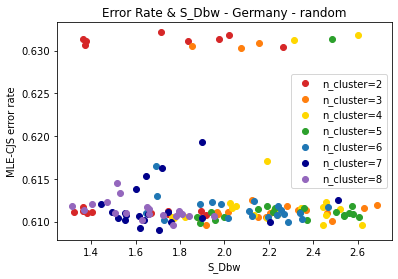

In [186]:
# scatter plot - Error Rate & S_Dbw
# result from p2 (diff with below block: corr - Error Rate & S_Dbw)
# random_data_df_from_p2 -> for random clustering + k-means plots

random_period_choose = 0

if random_period_choose == 0:
    err_record, std_record, time_record = err_record_p0, std_record_p0, time_record_p0
    s_dbw_record = s_dbw_record_p0
elif random_period_choose == 1:
    err_record, std_record, time_record = err_record_p1, std_record_p1, time_record_p1
    s_dbw_record = s_dbw_record_p1
    
# plot
if data_loc == 'France' or data_loc == 'Germany':
    plt.title(f'Error Rate & S_Dbw - {data_loc} - random')
else:
    plt.title(f'Error Rate & S_Dbw - {data_loc}_period_{random_period_choose} - random')
plt.xlabel('S_Dbw')
plt.ylabel('MLE-CJS error rate')

colors = ['tab:red', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'darkblue', 'tab:purple']

for n_cluster in range(7):
    _cluster = n_cluster+2
    plt.scatter(s_dbw_record[n_cluster], err_record[n_cluster], color=colors[n_cluster], label=f'n_cluster={_cluster}')
    print(f'\nn_cluster: {_cluster}')
    num_over_err_up_limit = 0
    num_is_nan = 0
    for label in range(label_number_each_n_cluster):
        if err_record[n_cluster][label] is None:
            num_over_err_up_limit += 1
        elif np.isnan(err_record[n_cluster][label]):
            num_is_nan += 1
    print(f'number of error rate > {err_up_limit}: {num_over_err_up_limit}')
    print(f'number of nan: {num_is_nan}')
    
plt.legend()

# Correlation Matrix - n_cluster, S_Dbw, err, std
# Pearson correlation

print(f'err_up_limit: {err_up_limit}')
print(f'{data_loc}_period_{random_period_choose}')
random_data_df_from_p2 = pd.DataFrame(columns = ['n_cluster', 'S_Dbw', 'err', 'std', 'CJS_time'], index=list(range(7*label_number_each_n_cluster)))

for n_cluster in [2,3,4,5,6,7,8]:
    for label in range(label_number_each_n_cluster):
        index = (n_cluster-2)*label_number_each_n_cluster+label
        random_data_df_from_p2['n_cluster'][index] = n_cluster
        random_data_df_from_p2['S_Dbw'][index] = s_dbw_record[n_cluster-2][label]
        random_data_df_from_p2['err'][index] = err_record[n_cluster-2][label]
        random_data_df_from_p2['std'][index] = std_record[n_cluster-2][label]
        random_data_df_from_p2['CJS_time'][index] = time_record[n_cluster-2][label]
        if err_record[n_cluster-2][label] is None:
            print(f'err is None: n_cluster={n_cluster}, label={label}')
            random_data_df_from_p2['err'][index] = 'None'
            random_data_df_from_p2['std'][index] = 'None'
        elif np.isnan(err_record[n_cluster-2][label]):
            print(f'err is nan: n_cluster={n_cluster}, label={label}')
            random_data_df_from_p2['err'][index] = 'None'
            random_data_df_from_p2['std'][index] = 'None'
            
# Delete these row indexes from dataFrame
indexNames = random_data_df_from_p2[ random_data_df_from_p2['err'] == 'None' ].index
print(f'drop index: {indexNames}')
random_data_df_from_p2.drop(indexNames , inplace=True)

print()
mean_err = np.mean(random_data_df_from_p2['err'])
print(f'mean err: {mean_err}')
max_time = max(random_data_df_from_p2['CJS_time'])
print(f'max CJS time: {max_time}')
print('\nfinish random_data_df_from_p2')

print(f'\nrandom_period_choose: {random_period_choose}')
random_data_df_from_p2.astype('float64').corr()

In [187]:
# estimation number = 0 on one date
# from "why_lower_nCluster_better_err_us.ipynb"

# random_period_choose = 0
n_clusters = [2,3,4,5,6,7,8]
label_number_each_n_cluster = 20
print(f'data_loc: {data_loc}, period_choose: {random_period_choose}')

# dataFrame for correlation
random_data_df = pd.DataFrame(columns = ['n_cluster', 'S_Dbw', 'err', 'est_0_class', 'est_0_ip'], index=list(range(7*label_number_each_n_cluster)))

if random_period_choose == 0:
    baseline_ip_sum = baseline_ip_sum_p0
    s_dbw_record = s_dbw_record_p0
elif random_period_choose == 1:
    baseline_ip_sum = baseline_ip_sum_p1
    s_dbw_record = s_dbw_record_p1
    
# how many (class or ip) est_number = 0 one one date
which_date_est_0 = []
std_avg_est_0_class = []

for n_cluster in n_clusters:
    num_0_est_class_list, num_0_est_ip_list = [], []
    print(f'\nn_cluster: {n_cluster}')
    for label in range(label_number_each_n_cluster):
        #print(f'\nlabel: {label}')
        index = (n_cluster-2)*label_number_each_n_cluster + label
        # baseline number in class
        baseline_num_class, class_ip_index = baseline_class(random_period_choose, n_cluster, label)
        baseline_num_class = np.array(baseline_num_class)

        # estimation number in class
        est_p, _ = r_label_2_p2(random_period_choose, n_cluster, label)
        sum_ch, ch_in_class = get_p1_caputure_history(random_period_choose, n_cluster, label)
        est_p, sum_ch = np.array(est_p), np.array(sum_ch)
        est_num_class = sum_ch[:, 1:] / est_p
        est_sum = np.sum(est_num_class, axis=0)
        err_class = np.abs( est_num_class[:,1:-2] - baseline_num_class[:,2:-2] ) / baseline_num_class[:,2:-2]
        
        # data_df
        random_data_df['n_cluster'][index] = n_cluster
        random_data_df['S_Dbw'][index] = s_dbw_record[n_cluster-2][label]
        random_data_df['err'][index] = np.mean(np.abs( est_sum[1:-2] - baseline_ip_sum[2:-2] ) / baseline_ip_sum[2:-2])            
        #print(f'err: { (np.abs( est_sum[1:-2] - baseline_ip_sum[2:-2] ) / baseline_ip_sum[2:-2])}')
        
        # one date est number = 0 (baseline != 0)
        num_0_est_class = 0 
        num_0_est_ip = 0
        for _class in range(n_cluster):
            std_avg = np.std(sum_ch[_class])/np.mean(sum_ch[_class])
            #print(f'\nstd/avg: {std_avg}')
            #print(f'mean err_class: {np.mean(err_class[_class])}')
            err_mean = np.mean(err_class[_class])
            #print(f'err_mean: {err_mean}\n')
            for num_date in range(len(err_class[_class])):
                num_date_est_0 = 0 # one date est number = 0 -> skip
                if num_date_est_0 > 0:
                    print('over one date est num = 0')
                    continue
                if est_num_class[:,1:-2][_class][num_date]==0 and baseline_num_class[:,2:-2][_class][num_date]!=0:
                    std_avg_est_0_class.append(std_avg)
                    num_0_est_class += 1
                    num_0_est_ip += len(class_ip_index[_class])
                    num_date_est_0 += 1
                    which_date_est_0.append(num_date)
        num_0_est_class_list.append(num_0_est_class)
        num_0_est_ip_list.append(num_0_est_ip)
        random_data_df['est_0_class'][index] = num_0_est_class
        random_data_df['est_0_ip'][index] = num_0_est_ip
    # print
    print(f'num_0_est_class: {num_0_est_class_list}')
    print(f'num_0_est_ip: {num_0_est_ip_list}')
    
# Delete these row indexes from dataFrame
indexNames = random_data_df[ random_data_df['err'] == 'None' ].index
print(f'drop index: {indexNames}')
random_data_df.drop(indexNames , inplace=True)

# std/avg 
std_avg_est_0_class = np.array(std_avg_est_0_class)
print('\nstd/avg of est=0 classes')
print(f'mean std/avg: {np.mean(std_avg_est_0_class)}')
print(f'std std/avg: {np.std(std_avg_est_0_class)}')

# which date est num = 0
which_date_est_0_dict = dict()
for date in which_date_est_0:
    if date not in which_date_est_0_dict:
        which_date_est_0_dict[date] = 1
    else:
        which_date_est_0_dict[date] += 1
print(f'which_date_est_0: {which_date_est_0_dict}')

# correlation matrix
print(f'\nperiod_choose: {random_period_choose}')
random_data_df.astype('float64').corr()

data_loc: Germany, period_choose: 0

n_cluster: 2
num_0_est_class: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_0_est_ip: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

n_cluster: 3
num_0_est_class: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_0_est_ip: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

n_cluster: 4
num_0_est_class: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_0_est_ip: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

n_cluster: 5
num_0_est_class: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_0_est_ip: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

n_cluster: 6
num_0_est_class: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_0_est_ip: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

n_cluster: 7
num_0_est_class: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
num_0_est_ip: [0, 0, 0, 0, 0, 0, 0, 0

C:\Users\Hsu_Cheng\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Hsu_Cheng\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Hsu_Cheng\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Hsu_Cheng\anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Hsu_Cheng\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,n_cluster,S_Dbw,err,est_0_class,est_0_ip
n_cluster,1.000000,-0.230470,-0.348357,NaN,NaN
S_Dbw,-0.230470,1.000000,-0.032409,NaN,NaN
err,-0.348357,-0.032409,1.000000,NaN,NaN
est_0_class,NaN,NaN,NaN,NaN,NaN
est_0_ip,NaN,NaN,NaN,NaN,NaN


cluster_err_up_limit: inf
n_cluster: 2
err_num_class: 40
n_cluster: 3
err_num_class: 60
n_cluster: 4
err_num_class: 80
n_cluster: 5
err_num_class: 100
n_cluster: 6
err_num_class: 120
n_cluster: 7
err_num_class: 140
n_cluster: 8
err_num_class: 160


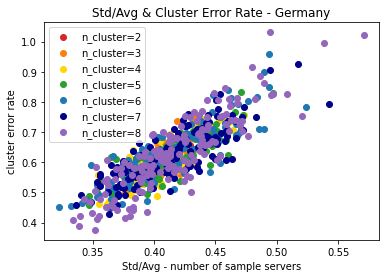

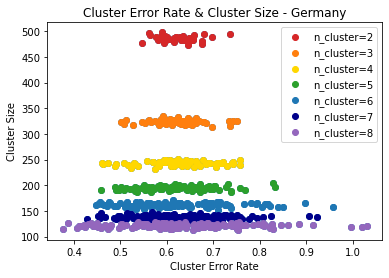

del list: []
140
corr (min_class_size, err): [[1.         0.40912828]
 [0.40912828 1.        ]]
del list: []
len(min_cluster_err): 140
min_cluster_bias_proportion: 0.0841618784355914
min_cluster_err: 0.6142080785762267
drop index: Int64Index([], dtype='int64')

mean err: 0.6133009731230494

period_choose: 0
                  n_cluster       err  mean_std/avg  max_std/avg  \
n_cluster          1.000000 -0.348357      0.963768     0.854473   
err               -0.348357  1.000000     -0.348230    -0.328256   
mean_std/avg       0.963768 -0.348230      1.000000     0.919985   
max_std/avg        0.854473 -0.328256      0.919985     1.000000   
min_cluster_size  -0.923217  0.409128     -0.897897    -0.793042   
min_cluster_err   -0.076456  0.093734     -0.084346    -0.117231   

                  min_cluster_size  min_cluster_err  
n_cluster                -0.923217        -0.076456  
err                       0.409128         0.093734  
mean_std/avg             -0.897897        -0.084346 

,n_cluster,cluster_err,std/avg,cluster_size
n_cluster,1.000000,0.027535,0.053487,-0.915208
cluster_err,0.027535,1.000000,0.840145,-0.017121
std/avg,0.053487,0.840145,1.000000,-0.048324
cluster_size,-0.915208,-0.017121,-0.048324,1.000000


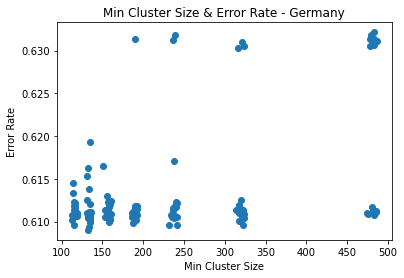

In [188]:
# scatter plot
# error rate in each cluster & error rate in each clustering result
# from "why_lower_nCluster_better_err_us.ipynb"

# random_period_choose = 1
n_clusters = [2,3,4,5,6,7,8]
label_number_each_n_cluster = 20
cluster_err_up_limit = math.inf
print(f'cluster_err_up_limit: {cluster_err_up_limit}')

# dataFrame for each cluster (class)
data_cluster_df = pd.DataFrame(columns = ['n_cluster', 'cluster_err', 'std/avg', 'cluster_size'], index=list(range(label_number_each_n_cluster*(np.sum(n_clusters)))))

# dataFrame for each clustering result
data_df = pd.DataFrame(columns = ['n_cluster', 'err', 'mean_std/avg', 'max_std/avg', 'min_cluster_size', 'min_cluster_err'], index=list(range(7*label_number_each_n_cluster)))

if random_period_choose == 0:
    baseline_ip_sum = baseline_ip_sum_p0
    s_dbw_record = s_dbw_record_p0
elif random_period_choose == 1:
    baseline_ip_sum = baseline_ip_sum_p1
    s_dbw_record = s_dbw_record_p1

# min_class_size for each clustering result
min_class_size = []
err_record = []
min_cluster_bias_proportion = [] # np.mean(bias_class[min_cluster_index]/est_sum[min_cluster_index])
min_cluster_err = []

# err & std/avg for each clusters
mean_class_err_record = []
std_avg_sample_num_record = []
cluster_size_record = []
index = 0 # for dataFrame
for n_cluster in n_clusters:
    #print(f'n_cluster: {n_cluster}')
    mean_class_err_record.append([])
    std_avg_sample_num_record.append([])
    cluster_size_record.append([])
    for label in range(label_number_each_n_cluster):
        #print(f'label: {label}')
        # baseline number in class
        baseline_num_class, class_ip_index = baseline_class(random_period_choose, n_cluster, label)
        baseline_num_class = np.array(baseline_num_class)
        #print(f'baseline_num_class: {baseline_num_class}')
        
        # estimation number in class
        est_p, _ = r_label_2_p2(random_period_choose, n_cluster, label)
        sum_ch, ch_in_class = get_p1_caputure_history(random_period_choose, n_cluster, label)
        est_p, sum_ch = np.array(est_p), np.array(sum_ch)
        est_num_class = sum_ch[:, 1:] / est_p
        #print(f'est_num_class: {est_num_class}')
        err_class = np.abs( est_num_class[:,1:-2] - baseline_num_class[:,2:-2] ) / baseline_num_class[:,2:-2]
        #print(f'err_class: {err_class}')
        
        # total est number
        est_sum = np.sum(est_num_class, axis=0)
        class_sizes = []
        for _class in range(n_cluster):
            class_sizes.append(len(class_ip_index[_class]))
            #print(f'class_{_class}, err_mean: {np.mean(err_class[_class])}, std(sum_ch)/avg(sum_ch): {np.std(sum_ch[_class])/np.mean(sum_ch[_class])}')
            #if np.std(sum_ch[_class])/np.mean(sum_ch[_class]) < -0.3: # np.std(sum_ch[_class])/np.mean(sum_ch[_class])
            #    continue
            if np.mean(err_class[_class]) > cluster_err_up_limit:
                continue
            mean_class_err_record[-1].append(np.mean(err_class[_class]))
            std_avg_sample_num_record[-1].append(np.std(sum_ch[_class])/np.mean(sum_ch[_class]))
            cluster_size_record[-1].append(len(class_ip_index[_class]))
            
            # dataFrame
            data_cluster_df['n_cluster'][index] = n_cluster
            data_cluster_df['cluster_err'][index] = mean_class_err_record[-1][-1]
            data_cluster_df['std/avg'][index] = std_avg_sample_num_record[-1][-1]
            data_cluster_df['cluster_size'][index] = len(class_ip_index[_class])
            index += 1
        #print(f'min class size: {min(class_sizes)}')
        min_class_size.append(min(class_sizes))
        err_record.append(np.mean(np.abs( est_sum[1:-2] - baseline_ip_sum[2:-2] ) / baseline_ip_sum[2:-2]))
        # bias in min cluster
        min_cluster_index = class_sizes.index(min(class_sizes))
        bias_class = np.abs(est_num_class[:,1:-2] - baseline_num_class[:,2:-2])
        nan_in_bias_class = False
        for bias in bias_class[min_cluster_index]:
            if np.isnan(bias):
                nan_in_bias_class = True
        if not nan_in_bias_class:
            min_cluster_bias_proportion.append(np.mean(bias_class[min_cluster_index]/est_sum[1:-2]))
            min_cluster_err.append(np.mean(err_class[min_cluster_index]))
        #print(f'min_cluster_bias_proportion: {min_cluster_bias_proportion[-1]}')
        #print(f'min_cluster_err: {min_cluster_err[-1]}')
        data_df_index = (n_cluster-2)*label_number_each_n_cluster + label
        data_df['n_cluster'][data_df_index] = n_cluster
        data_df['err'][data_df_index] = np.mean(np.abs( est_sum[1:-2] - baseline_ip_sum[2:-2] ) / baseline_ip_sum[2:-2])
        data_df['mean_std/avg'][data_df_index] = np.mean(std_avg_sample_num_record[-1])
        data_df['max_std/avg'][data_df_index] = max(std_avg_sample_num_record[-1])
        data_df['min_cluster_size'][data_df_index] = min(class_sizes)
        data_df['min_cluster_err'][data_df_index] = np.mean(err_class[min_cluster_index])
        
# title for scatter plots
if data_loc == 'France' or data_loc == 'Germany':
    data_loc_rm_period = f'{data_loc}'
else:
    data_loc_rm_period = f'{data_loc}_period_{random_period_choose}'

# scatter plot - sample num std & err mean
plt.title(f'Std/Avg & Cluster Error Rate - {data_loc_rm_period}')
plt.xlabel('Std/Avg - number of sample servers')
plt.ylabel('cluster error rate')

colors = ['tab:red', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'darkblue', 'tab:purple']

err_sum=0
err_num=0
for n_cluster in range(7):
    _cluster = n_cluster+2
    print(f'n_cluster: {_cluster}')
    plt.scatter(std_avg_sample_num_record[n_cluster], mean_class_err_record[n_cluster], color=colors[n_cluster], label=f'n_cluster={_cluster}')
    #print(f'max_err: {max(mean_class_err_record[n_cluster])}')
    #print(f'min_std/avg: {min(std_avg_sample_num_record[n_cluster])}')
    #print(mean_class_err_record[n_cluster])
    err_num_class = 0
    for err_i in range(len(mean_class_err_record[n_cluster])):
        err = mean_class_err_record[n_cluster][err_i]
        if np.isnan(err):
            print(f'err is nan: {err_i}')
            continue
        err_sum += err
        err_num += 1
        err_num_class += 1
    print(f'err_num_class: {err_num_class}')
    
    
plt.legend()
plt.show()

# scatter plot - err mean & Cluster size
plt.title(f'Cluster Error Rate & Cluster Size - {data_loc_rm_period}')
plt.xlabel('Cluster Error Rate')
plt.ylabel('Cluster Size')
plt.scatter(data_cluster_df['cluster_err'], data_cluster_df['cluster_size'])

for n_cluster in range(7):
    _cluster = n_cluster+2
    #plt.scatter(std_avg_sample_num_record[n_cluster], mean_class_err_record[n_cluster], color=colors[n_cluster], label=f'n_cluster={_cluster}')
    plt.scatter(mean_class_err_record[n_cluster], cluster_size_record[n_cluster], color=colors[n_cluster], label=f'n_cluster={_cluster}')
    err_num_class = 0
    for err_i in range(len(mean_class_err_record[n_cluster])):
        err = mean_class_err_record[n_cluster][err_i]
        if np.isnan(err):
            print(f'err is nan: {err_i}')
            continue
        err_sum += err
        err_num += 1
        err_num_class += 1
    
    
plt.legend()
plt.show()


# scatter plot - err mean & min class size
plt.title(f'Min Cluster Size & Error Rate - {data_loc_rm_period}')
plt.xlabel('Min Cluster Size')
plt.ylabel('Error Rate')
        
plt.scatter(min_class_size, err_record)

del_nan_list = []
for i in range(len(err_record)):
    if np.isnan(err_record[i]):
        del_nan_list.append(i)
print(f'del list: {del_nan_list}')
min_class_size=np.delete(min_class_size, del_nan_list)
err_record=np.delete(err_record, del_nan_list)
print(len(err_record))
print(f'corr (min_class_size, err): {np.corrcoef(min_class_size, err_record)}')
#print(f'min_cluster_bias_proportion: {min_cluster_bias_proportion}')
#print(f'min_cluster_err: {min_cluster_err}')

min_cluster_err, del_nan_list = get_del_nan_list(min_cluster_err)
print(f'len(min_cluster_err): {len(min_cluster_err)}')
print(f'min_cluster_bias_proportion: {np.mean(np.delete(min_cluster_bias_proportion, del_nan_list))}')
print(f'min_cluster_err: {np.mean(min_cluster_err)}')


# Delete these row indexes from dataFrame
indexNames = data_cluster_df[ data_cluster_df['cluster_err'] == 'None' ].index
print(f'drop index: {indexNames}')
data_cluster_df.drop(indexNames , inplace=True)

# mean err: random & k-means with low S_dbw
mean_err = np.mean(data_df['err'])
print(f'\nmean err: {mean_err}')

# correlation matrix
print(f'\nperiod_choose: {random_period_choose}')
print(data_df.astype('float64').corr())

print(f'\nperiod_choose: {random_period_choose}')
data_cluster_df.astype('float64').corr()

In [189]:
# random result

################# 分隔線 ###############

# random + k-means results

km_data_loc: Germany, period: 0

n_cluster: 2
number of error rate > 100: 0
number of nan: 0

n_cluster: 3
number of error rate > 100: 0
number of nan: 0

n_cluster: 4
number of error rate > 100: 0
number of nan: 0

n_cluster: 5
number of error rate > 100: 0
number of nan: 0

n_cluster: 6
number of error rate > 100: 1
number of nan: 0

n_cluster: 7
number of error rate > 100: 2
number of nan: 0

n_cluster: 8
number of error rate > 100: 3
number of nan: 0


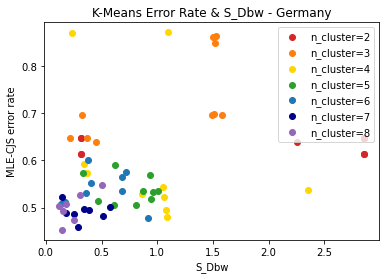

In [190]:
# k-means clustering result

km_period = 0
if data_loc == 'us':
    km_data_loc = f'us_period_{km_period}'
else: km_data_loc = data_loc
    
print(f'km_data_loc: {km_data_loc}, period: {km_period}')

km_label_number_each_n_cluster = 10


kmeans_data_df = pd.DataFrame(columns = ['n_cluster', 'S_Dbw', 'err', 'std', 'CJS_time'], index=list(range(7*km_label_number_each_n_cluster)))

# err > err_up_limit -> not write into record
kmeans_err_up_limit = 10**2

kmeans_err_record, kmeans_std_record, kmeans_time_record = [], [], []
for n_cluster in [2,3,4,5,6,7,8]:
    kmeans_err_record.append([])
    kmeans_std_record.append([])
    kmeans_time_record.append([])
    for label in range(km_label_number_each_n_cluster):
        df_index = (n_cluster-2)*km_label_number_each_n_cluster + label
        file_path = f'./{km_data_loc}/p2_est_result/{file_path_period[km_period]}n_cluster_{n_cluster}/label_{label}.txt'
        with open(file_path) as f:
            lines = f.readlines()
        kmeans_time_record[-1].append(float(lines[-1][10:]))
        if float(lines[0][5:]) > kmeans_err_up_limit:
            kmeans_err_record[-1].append(None)
            kmeans_std_record[-1].append(None)
        else:
            kmeans_err_record[-1].append(float(lines[0][5:]))
            kmeans_std_record[-1].append(float(lines[1][5:]))
            
        # kmeans_data_df
        kmeans_data_df['n_cluster'][df_index] = n_cluster
        #kmeans_data_df['S_Dbw'][index]
        kmeans_data_df['err'][df_index] = float(lines[0][5:])
        kmeans_data_df['std'][df_index] = float(lines[1][5:])
        kmeans_data_df['CJS_time'][df_index] = float(lines[-1][10:])
            
        
# s_dbw_record
kmeans_s_dbw_record = []
kmeans_s_dbw_file_path = f'../Af_oral/{km_data_loc}/p0_cluster_result/{file_path_period[km_period]}s_dbw_record.csv'
kmeans_df_sdbw = pd.read_csv(kmeans_s_dbw_file_path)
kmeans_df_sdbw.head()
for n_cluster in range(7): # n_cluster=2~8
    kmeans_s_dbw_record.append([])
    for label in range(km_label_number_each_n_cluster):
        index = n_cluster*km_label_number_each_n_cluster + label
        kmeans_s_dbw_record[-1].append(kmeans_df_sdbw['S_Dbw'][index])
        kmeans_data_df['S_Dbw'][index] = kmeans_df_sdbw['S_Dbw'][index]
        
# title for scatter plots
if data_loc == 'France' or data_loc == 'Germany':
    km_data_loc_rm_period = f'{km_data_loc}'
else:
    km_data_loc_rm_period = f'{km_data_loc}_period_{km_period}'

# scatter plot - Error Rate & S_Dbw

plt.title(f'K-Means Error Rate & S_Dbw - {km_data_loc_rm_period}')
plt.xlabel('S_Dbw')
plt.ylabel('MLE-CJS error rate')

colors = ['tab:red', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'darkblue', 'tab:purple']

for n_cluster in range(7):
    _cluster = n_cluster+2
    plt.scatter(kmeans_s_dbw_record[n_cluster], kmeans_err_record[n_cluster], color=colors[n_cluster], label=f'n_cluster={_cluster}')
    print(f'\nn_cluster: {_cluster}')
    num_over_err_up_limit = 0
    num_is_nan = 0
    for label in range(10):
        if kmeans_err_record[n_cluster][label] is None:
            num_over_err_up_limit += 1
        elif np.isnan(kmeans_err_record[n_cluster][label]):
            num_is_nan += 1
    print(f'number of error rate > {kmeans_err_up_limit}: {num_over_err_up_limit}')
    print(f'number of nan: {num_is_nan}')
    
plt.legend()

In [191]:
# to get the mean error rate with lower s_dbw
km_sdbw_up_limit = 0.5

err_low_sdbw = []
for i in range(len(kmeans_data_df)):
    if kmeans_data_df['S_Dbw'][i] < km_sdbw_up_limit:
        err_low_sdbw.append(kmeans_data_df['err'][i])
        
print(f's_dbw_upper_limit: {km_sdbw_up_limit}, mean err: {np.mean(err_low_sdbw)} ({len(err_low_sdbw)} result)')

s_dbw_upper_limit: 0.5, mean err: inf (35 result)


random period_choose: 0
km_period: 0
km_data_loc: Germany


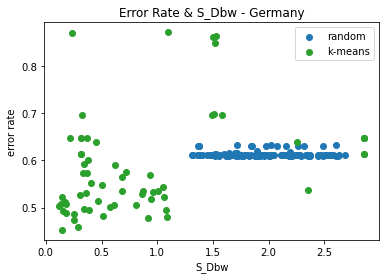

random clustering err upper limit: inf
kmeans_err_up_limit: 100


In [192]:
# random clustering (blue) + k-means (green)


if random_period_choose != km_period:
    print('period not match!!\n')
    
print(f'random period_choose: {random_period_choose}')
print(f'km_period: {km_period}')
print(f'km_data_loc: {km_data_loc}')

plt.title(f'Error Rate & S_Dbw - {km_data_loc_rm_period}')
plt.xlabel('S_Dbw')
plt.ylabel('error rate')

plt.scatter(random_data_df_from_p2['S_Dbw'], random_data_df_from_p2['err'], color='tab:blue', label='random')

# all k-means result
#plt.scatter(kmeans_data_df['S_Dbw'], kmeans_data_df['err'], color='tab:green', label='k-means')

# k-means result with err < upper_limit
plt.scatter(kmeans_data_df['S_Dbw'], kmeans_err_record, color='tab:green', label='k-means')

plt.legend()
plt.show()

print(f'random clustering err upper limit: {err_up_limit}')
print(f'kmeans_err_up_limit: {kmeans_err_up_limit}')

In [193]:
################
# for cluster error rate - cluster size, std/avg

In [194]:
# caculate baseline in clusters
def km_baseline_class(period_choose, n_cluster, label):
    id_index_path = f'./{file_path_data_loc[period_choose]}/p1_capture_history/{file_path_period[period_choose]}ip_index.txt'
    with open(id_index_path) as f:
        ip_index = f.readlines()
    group_path = f'./{file_path_data_loc[period_choose]}/p1_capture_history/{file_path_period[period_choose]}n_cluster_{n_cluster}/group_label_{label}.txt'
    with open(group_path) as f:
        groups = f.readlines()
        
    if period_choose == 0:
        ip_date_dict = ip_date_dict_p0
    elif period_choose == 1:
        ip_date_dict = ip_date_dict_p1
    baseline_ip_num_class = []
    #baseline_ip_3p_trans_count = []
    for date in sorted(ip_date_dict):
        #print(date)
        baseline_ip_num_class.append([]) # new date
        for i in range(n_cluster):
            baseline_ip_num_class[-1].append(0) # each class number
        for i in range(len(ip_index)):
            ip = ip_index[i][:-1] # last two is '\n'
            group = int(groups[i][5]) # class0, class1, ...
            if ip in ip_date_dict[date]:
                baseline_ip_num_class[-1][group] += 1
                
        # 3-period_trans_count
        #for ip in ip_date_dict[date]:
    # change to format: [[class_0], [class_1], ...]
    out_baseline_ip_num_class = []
    for _class in range(n_cluster):
        out_baseline_ip_num_class.append([])
        for date in range(len(baseline_ip_num_class)):
            out_baseline_ip_num_class[-1].append(baseline_ip_num_class[date][_class])
            
    # ip index for each class
    baseline_ip_index_class = []
    for i in range(n_cluster):
        baseline_ip_index_class.append([]) # each class
    for i in range(len(ip_index)):
        ip = ip_index[i][:-1] # last two is '\n'
        group = int(groups[i][5]) # class0, class1, ...
        baseline_ip_index_class[group].append(ip)
    return out_baseline_ip_num_class, baseline_ip_index_class


In [195]:
# Get the capture_p from R
def km_r_label_2_p2(period_choose, n_cluster, label):
    file_path = f'./{file_path_data_loc[period_choose]}/R_capture_probability/{file_path_period[period_choose]}n_cluster_{n_cluster}/r_{label}.txt'
    with open(file_path) as f:
        lines = f.readlines()
    # locate the p
    start=100000
    end=0
    numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    for i in range(len(lines)):
        if lines[i][:2] == '$p':
            start=i+1
        elif lines[i] == lines[-3]:
            end=i
    CJS_time_use = float(lines[-1][19:-6])
    # record class, time, est
    class_loc, time_loc = 0,0 # new: for locate where the class and time in one line
    for i in range(len(lines[start])):
        if lines[start][i]=='c': # cluster
            if lines[start][i+1]=='l' and lines[start][i+6]=='r':
                class_loc=i+6
        elif lines[start][i]=='t': # time
            if lines[start][i+1]=='i': # avoid 'estimate'
                if lines[start][i+3]=='e':
                    time_loc=i+3
    class_record = []
    time_record = []
    est_record = [] # ex: 6.197041e-01
    for line in lines[start+1:-2]:
        #print(line)
        class_record.append(int(line[class_loc]))
        if line[time_loc-1] in numbers:
            time_record.append(int(line[time_loc-1:time_loc+1]))
        else:
            time_record.append(int(line[time_loc]))
        est_record.append(float(line[time_loc+6:-1]))
    
    clusters = np.unique(class_record)
    num_cluster = len(clusters)
    time_len = len(dates[period_choose])-1 # time = 2 ~ last date
    est_p_sort = [] # [[], []] num of class = num of list()
    for i in range(num_cluster):
        est_p_sort.append([])
        for j in range(time_len):
            est_p_sort[-1].append(0) # est num will be 'INF' if append '0' and some data not load 
    for i in range(len(time_record)):
        #print(f'class_record: {class_record[i]}, time_record: {time_record[i]}, est_record: {est_record[i]}')
        est_p_sort[class_record[i]][time_record[i]-2] = est_record[i]
    return est_p_sort, CJS_time_use


In [196]:
# Get the capture history from p1
def km_get_p1_caputure_history(period_choose, n_cluster, label):
    label_path = f'./{file_path_data_loc[period_choose]}/p1_capture_history/{file_path_period[period_choose]}n_cluster_{n_cluster}/label_{label}.txt'
    with open(label_path) as f:
        chs = f.readlines()
    group_path = f'./{file_path_data_loc[period_choose]}/p1_capture_history/{file_path_period[period_choose]}n_cluster_{n_cluster}/group_label_{label}.txt'
    with open(group_path) as f:
        groups = f.readlines()
    ch_in_class = [] # [[capture_history in class-0], [capture_history in class-1], ...]
    for i in range(n_cluster):
        ch_in_class.append([])
    for i in range(len(chs)):
        group = int(groups[i][5])
        ch_in_class[group].append(chs[i][:-1]) # last 2 is \n
        
    sum_ch_in_class = [] # [[sample number in class-0], [sample number in class-1], ...]
    for _class in range(len(ch_in_class)): # class
        sum_class = []
        for date in range(len(dates[period_choose])):
            sum_class.append(0)
            for j in range(len(ch_in_class[_class])): # servers in a class
                sum_class[date] += int(ch_in_class[_class][j][date])
        sum_ch_in_class.append(sum_class)
    return sum_ch_in_class, ch_in_class

In [197]:
# err_record, std_record, time_record, s_dbw_record
# err_up_limit

print(f'data_loc: {data_loc}')
print(f'file_path_data_loc: {file_path_data_loc}')
km_label_number_each_n_cluster = 10

# err > err_up_limit -> not write into record
err_up_limit = math.inf #10**2
print(f'err_up_limit: {err_up_limit}')
    
# error rate - clustering result
period_choose = 0
km_err_record_p0, km_std_record_p0, km_time_record_p0 = [], [], []
for n_cluster in [2,3,4,5,6,7,8]:
    km_err_record_p0.append([])
    km_std_record_p0.append([])
    km_time_record_p0.append([])
    for label in range(km_label_number_each_n_cluster):
        file_path = f'./{file_path_data_loc[0]}/p2_est_result/{file_path_period[period_choose]}n_cluster_{n_cluster}/label_{label}.txt'
        with open(file_path) as f:
            lines = f.readlines()
        km_time_record_p0[-1].append(float(lines[-1][10:]))
        if float(lines[0][5:]) > err_up_limit:
            km_err_record_p0[-1].append(None)
            km_std_record_p0[-1].append(None)
        else:
            km_err_record_p0[-1].append(float(lines[0][5:]))
            km_std_record_p0[-1].append(float(lines[1][5:]))
            
period_choose = 1
km_err_record_p1, km_std_record_p1, km_time_record_p1 = [], [], []
for n_cluster in [2,3,4,5,6,7,8]:
    km_err_record_p1.append([])
    km_std_record_p1.append([])
    km_time_record_p1.append([])
    for label in range(km_label_number_each_n_cluster):
        file_path = f'./{file_path_data_loc[1]}/p2_est_result/{file_path_period[period_choose]}n_cluster_{n_cluster}/label_{label}.txt'
        with open(file_path) as f:
            lines = f.readlines()
        km_time_record_p1[-1].append(float(lines[-1][10:]))
        if float(lines[0][5:]) > err_up_limit:
            km_err_record_p1[-1].append(None)
            km_std_record_p1[-1].append(None)
        else:
            km_err_record_p1[-1].append(float(lines[0][5:]))
            km_std_record_p1[-1].append(float(lines[1][5:]))
        
print('finish k-means err_record, std_record, time_record')

# s_dbw_record
period_choose = 0
km_s_dbw_record_p0 = []
km_s_dbw_file_path = f'./{file_path_data_loc[0]}/p0_cluster_result/{file_path_period[period_choose]}s_dbw_record.csv'
km_df_sdbw_p0 = pd.read_csv(s_dbw_file_path)
for n_cluster in range(7): # n_cluster=2~8
    km_s_dbw_record_p0.append([])
    for label in range(km_label_number_each_n_cluster):
        km_s_dbw_record_p0[-1].append(km_df_sdbw_p0['S_Dbw'][n_cluster*km_label_number_each_n_cluster+label])
        
period_choose = 1
km_s_dbw_record_p1 = []
km_s_dbw_file_path = f'./{file_path_data_loc[1]}/p0_cluster_result/{file_path_period[period_choose]}s_dbw_record.csv'
km_df_sdbw_p1 = pd.read_csv(km_s_dbw_file_path)
for n_cluster in range(7): # n_cluster=2~8
    km_s_dbw_record_p1.append([])
    for label in range(km_label_number_each_n_cluster):
        km_s_dbw_record_p1[-1].append(km_df_sdbw_p1['S_Dbw'][n_cluster*km_label_number_each_n_cluster+label])
        
print('finish km_s_dbw_record')

data_loc: Germany
file_path_data_loc: ['Germany', 'Germany']
err_up_limit: inf
finish k-means err_record, std_record, time_record
finish km_s_dbw_record


C:\Users\HSU_CH~1\AppData\Local\Temp/ipykernel_7100/3959076961.py:48: RuntimeWarning: invalid value encountered in true_divide
  err_class = np.abs( est_num_class[:,1:-2] - baseline_num_class[:,2:-2] ) / baseline_num_class[:,2:-2]
C:\Users\HSU_CH~1\AppData\Local\Temp/ipykernel_7100/3959076961.py:47: RuntimeWarning: divide by zero encountered in true_divide
  est_num_class = sum_ch[:, 1:] / est_p
C:\Users\HSU_CH~1\AppData\Local\Temp/ipykernel_7100/3959076961.py:47: RuntimeWarning: invalid value encountered in true_divide
  est_num_class = sum_ch[:, 1:] / est_p


Std/Avg & Cluster Error Rate
n_cluster: 2, err_num_class: 0
n_cluster: 3, err_num_class: 0
n_cluster: 4, err_num_class: 0
n_cluster: 5, err_num_class: 0
n_cluster: 6, err_num_class: 0
n_cluster: 7, err_num_class: 0
n_cluster: 8, err_num_class: 0


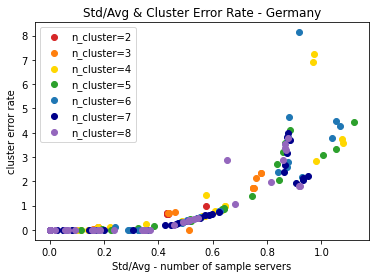

km_err_up_limit: 100
Cluster Error Rate & Cluster Size
n_cluster: 2, err_num_class: 20
n_cluster: 3, err_num_class: 29
n_cluster: 4, err_num_class: 33
n_cluster: 5, err_num_class: 39
n_cluster: 6, err_num_class: 42
n_cluster: 7, err_num_class: 38
n_cluster: 8, err_num_class: 38


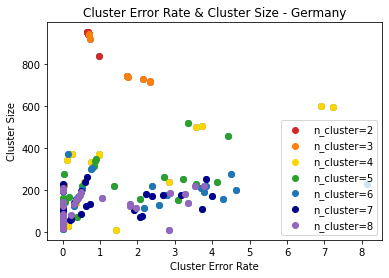

del list: []
64
corr (min_class_size, err): [[ 1.         -0.01667418]
 [-0.01667418  1.        ]]
del list: [13, 23, 41, 45, 50, 52, 53, 60, 62, 63]
len(min_cluster_err): 54
min_cluster_bias_proportion: 0.000999980645086085
min_cluster_err: 0.09804438612450685
drop index: Int64Index([], dtype='int64')

mean err: 0.5831675942837711

k-means period_choose: 0
                  n_cluster       err  mean_std/avg  max_std/avg  \
n_cluster          1.000000 -0.636136      0.862172     0.889108   
err               -0.636136  1.000000     -0.625273    -0.624554   
mean_std/avg       0.862172 -0.625273      1.000000     0.959673   
max_std/avg        0.889108 -0.624554      0.959673     1.000000   
min_cluster_size  -0.204087 -0.016674     -0.031363    -0.070852   
min_cluster_err    0.226184  0.089904      0.177177     0.155561   

                  min_cluster_size  min_cluster_err  
n_cluster                -0.204087         0.226184  
err                      -0.016674         0.089904  
m

,n_cluster,cluster_err,std/avg,cluster_size
n_cluster,1.000000,0.075190,0.234976,-0.416105
cluster_err,0.075190,1.000000,0.827888,0.287572
std/avg,0.234976,0.827888,1.000000,0.251534
cluster_size,-0.416105,0.287572,0.251534,1.000000


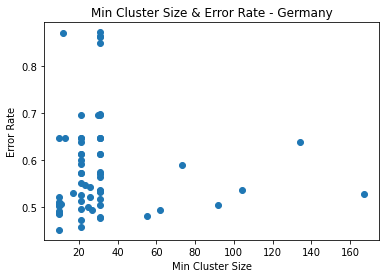

In [202]:
# k-means
# cluster error rate - cluster size, std/avg

km_period_choose = 0
n_clusters = [2,3,4,5,6,7,8]
km_label_number_each_n_cluster = 10
cluster_err_up_limit = math.inf #math.inf
km_err_up_limit = 100

# dataFrame for each cluster (class)
km_data_cluster_df = pd.DataFrame(columns = ['n_cluster', 'cluster_err', 'std/avg', 'cluster_size'], index=list(range(km_label_number_each_n_cluster*(np.sum(n_clusters)))))

# dataFrame for each clustering result
km_data_df = pd.DataFrame(columns = ['n_cluster', 'err', 'mean_std/avg', 'max_std/avg', 'min_cluster_size', 'min_cluster_err'], index=list(range(7*km_label_number_each_n_cluster)))

if km_period_choose == 0:
    baseline_ip_sum = baseline_ip_sum_p0
    s_dbw_record = km_s_dbw_record_p0
elif km_period_choose == 1:
    baseline_ip_sum = baseline_ip_sum_p1
    s_dbw_record = km_s_dbw_record_p1

# min_class_size for each clustering result
min_class_size = []
err_record = []
min_cluster_bias_proportion = [] # np.mean(bias_class[min_cluster_index]/est_sum[min_cluster_index])
min_cluster_err = []

# err & std/avg for each clusters
mean_class_err_record = []
cluster_size_record = []
std_avg_sample_num_record = []
index = 0 # for dataFrame
for n_cluster in n_clusters:
    mean_class_err_record.append([])
    std_avg_sample_num_record.append([])
    cluster_size_record.append([])
    for label in range(km_label_number_each_n_cluster):
        # baseline number in class
        baseline_num_class, class_ip_index = km_baseline_class(km_period_choose, n_cluster, label)
        baseline_num_class = np.array(baseline_num_class)
        
        # estimation number in class
        est_p, _ = km_r_label_2_p2(km_period_choose, n_cluster, label)
        sum_ch, ch_in_class = km_get_p1_caputure_history(km_period_choose, n_cluster, label)
        est_p, sum_ch = np.array(est_p), np.array(sum_ch)
        est_num_class = sum_ch[:, 1:] / est_p
        err_class = np.abs( est_num_class[:,1:-2] - baseline_num_class[:,2:-2] ) / baseline_num_class[:,2:-2]
        
        # total est number
        est_sum = np.sum(est_num_class, axis=0)
        # error rate
        err = np.mean(np.abs( est_sum[1:-2] - baseline_ip_sum[2:-2] ) / baseline_ip_sum[2:-2])
        if err > km_err_up_limit:
            continue
        class_sizes = []
        for _class in range(n_cluster):
            class_sizes.append(len(class_ip_index[_class]))
            #print(f'class_{_class}, err_mean: {np.mean(err_class[_class])}, std(sum_ch)/avg(sum_ch): {np.std(sum_ch[_class])/np.mean(sum_ch[_class])}')
            #if np.std(sum_ch[_class])/np.mean(sum_ch[_class]) < -0.3: # np.std(sum_ch[_class])/np.mean(sum_ch[_class])
            #    continue
            if np.mean(err_class[_class]) > cluster_err_up_limit:
                km_data_cluster_df['cluster_err'][index] = "None"
                continue
            mean_class_err_record[-1].append(np.mean(err_class[_class]))
            std_avg_sample_num_record[-1].append(np.std(sum_ch[_class])/np.mean(sum_ch[_class]))
            cluster_size_record[-1].append(len(class_ip_index[_class]))
            
            # dataFrame
            km_data_cluster_df['n_cluster'][index] = n_cluster
            km_data_cluster_df['cluster_err'][index] = mean_class_err_record[-1][-1]
            km_data_cluster_df['std/avg'][index] = std_avg_sample_num_record[-1][-1]
            km_data_cluster_df['cluster_size'][index] = len(class_ip_index[_class])
            index += 1
        #print(f'min class size: {min(class_sizes)}')
        min_class_size.append(min(class_sizes))
        err_record.append(np.mean(np.abs( est_sum[1:-2] - baseline_ip_sum[2:-2] ) / baseline_ip_sum[2:-2]))
        # bias in min cluster
        min_cluster_index = class_sizes.index(min(class_sizes))
        bias_class = np.abs(est_num_class[:,1:-2] - baseline_num_class[:,2:-2])
        nan_in_bias_class = False
        for bias in bias_class[min_cluster_index]:
            if np.isnan(bias):
                nan_in_bias_class = True
        if not nan_in_bias_class:
            min_cluster_bias_proportion.append(np.mean(bias_class[min_cluster_index]/est_sum[1:-2]))
            min_cluster_err.append(np.mean(err_class[min_cluster_index]))
        data_df_index = (n_cluster-2)*km_label_number_each_n_cluster + label
        km_data_df['n_cluster'][data_df_index] = n_cluster
        km_data_df['err'][data_df_index] = np.mean(np.abs( est_sum[1:-2] - baseline_ip_sum[2:-2] ) / baseline_ip_sum[2:-2])
        km_data_df['mean_std/avg'][data_df_index] = np.mean(std_avg_sample_num_record[-1])
        km_data_df['max_std/avg'][data_df_index] = max(std_avg_sample_num_record[-1])
        km_data_df['min_cluster_size'][data_df_index] = min(class_sizes)
        km_data_df['min_cluster_err'][data_df_index] = np.mean(err_class[min_cluster_index])
        
# title for scatter plots
if data_loc == 'France' or data_loc == 'Germany':
    data_loc_rm_period = f'{data_loc}'
else:
    data_loc_rm_period = f'{data_loc}_period_{km_period_choose}'

# scatter plot - sample num std & err mean
plt.title(f'Std/Avg & Cluster Error Rate - {data_loc_rm_period}')
plt.xlabel('Std/Avg - number of sample servers')
plt.ylabel('cluster error rate')

colors = ['tab:red', 'tab:orange', 'gold', 'tab:green', 'tab:blue', 'darkblue', 'tab:purple']

print('Std/Avg & Cluster Error Rate')
#err_sum=0
#err_num=0
for n_cluster in range(7):
    _cluster = n_cluster+2
    plt.scatter(std_avg_sample_num_record[n_cluster], mean_class_err_record[n_cluster], color=colors[n_cluster], label=f'n_cluster={_cluster}')
    err_num_class = 0
    for err_i in range(len(mean_class_err_record[n_cluster])):
        err = mean_class_err_record[n_cluster][err_i]
        if np.isnan(err):
            #print(f'err is nan: {err_i}')
            continue
        #err_sum += err
        #err_num += 1
        err_num_class += 1
    print(f'n_cluster: {_cluster}, err_num_class: {err_num_class}')
    
    
plt.legend()
plt.show()
print(f'km_err_up_limit: {km_err_up_limit}')


# scatter plot - err mean & Cluster size
plt.title(f'Cluster Error Rate & Cluster Size - {data_loc_rm_period}')
plt.xlabel('Cluster Error Rate')
plt.ylabel('Cluster Size')
plt.scatter(km_data_cluster_df['cluster_err'], km_data_cluster_df['cluster_size'])

print('Cluster Error Rate & Cluster Size')
for n_cluster in range(7):
    _cluster = n_cluster+2
    plt.scatter(mean_class_err_record[n_cluster], cluster_size_record[n_cluster], color=colors[n_cluster], label=f'n_cluster={_cluster}')
    err_num_class = 0
    for err_i in range(len(mean_class_err_record[n_cluster])):
        err = mean_class_err_record[n_cluster][err_i]
        if np.isnan(err):
            #print(f'err is nan: {err_i}')
            continue
        #err_sum += err
        #err_num += 1
        err_num_class += 1
    print(f'n_cluster: {_cluster}, err_num_class: {err_num_class}')
    
    
plt.legend()
plt.show()


# scatter plot - err mean & min class size
plt.title(f'Min Cluster Size & Error Rate - {data_loc_rm_period}')
plt.xlabel('Min Cluster Size')
plt.ylabel('Error Rate')
        
plt.scatter(min_class_size, err_record)

del_nan_list = []
for i in range(len(err_record)):
    if np.isnan(err_record[i]):
        del_nan_list.append(i)
print(f'del list: {del_nan_list}')
min_class_size=np.delete(min_class_size, del_nan_list)
err_record=np.delete(err_record, del_nan_list)
print(len(err_record))
print(f'corr (min_class_size, err): {np.corrcoef(min_class_size, err_record)}')

min_cluster_err, del_nan_list = get_del_nan_list(min_cluster_err)
print(f'len(min_cluster_err): {len(min_cluster_err)}')
print(f'min_cluster_bias_proportion: {np.mean(np.delete(min_cluster_bias_proportion, del_nan_list))}')
print(f'min_cluster_err: {np.mean(min_cluster_err)}')


# Delete these row indexes from dataFrame
indexNames = km_data_cluster_df[ km_data_cluster_df['cluster_err'] == 'None' ].index
print(f'drop index: {indexNames}')
km_data_cluster_df.drop(indexNames , inplace=True)

# mean err: random & k-means with low S_dbw
mean_err = np.mean(km_data_df['err'])
print(f'\nmean err: {mean_err}')

# correlation matrix
print(f'\nk-means period_choose: {km_period_choose}')
print(km_data_df.astype('float64').corr())

print(f'\nk-means period_choose: {km_period_choose}')
km_data_cluster_df.astype('float64').corr()

In [ ]:
######### 

In [ ]:
a=[1,2,None]
b=[1,2,3]

plt.scatter(a,b)